In [ ]:
# We are analyzing the coco 2014 dataset for image captioning, act as a professional deep learning programmer

In [ ]:
! wget http://images.cocodataset.org/zips/train2014.zip
! wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
! sudo apt-get install unzip
! unzip train2014.zip.zip -d coco
! unzip annotations_trainval2014.zip -d coco

# Setup

In [50]:
! pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [2]:
from classes.dataset_loader import DatasetLoader

dataset_loader = DatasetLoader()

Loading data..


KeyboardInterrupt: 

In [25]:
df_images = dataset_loader.get_df_images()
df_images

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,5,COCO_train2014_000000057870.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-14 16:28:13,http://farm4.staticflickr.com/3153/2970773875_...,57870
1,5,COCO_train2014_000000384029.jpg,http://images.cocodataset.org/train2014/COCO_t...,429,640,2013-11-14 16:29:45,http://farm3.staticflickr.com/2422/3577229611_...,384029
2,1,COCO_train2014_000000222016.jpg,http://images.cocodataset.org/train2014/COCO_t...,640,480,2013-11-14 16:37:59,http://farm2.staticflickr.com/1431/1118526611_...,222016
3,3,COCO_train2014_000000520950.jpg,http://images.cocodataset.org/train2014/COCO_t...,427,640,2013-11-14 16:44:40,http://farm8.staticflickr.com/7007/6413705793_...,520950
4,4,COCO_train2014_000000069675.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-14 16:46:33,http://farm8.staticflickr.com/7156/6415223357_...,69675
...,...,...,...,...,...,...,...,...
82778,1,COCO_train2014_000000444010.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-25 14:46:11,http://farm4.staticflickr.com/3697/9303670993_...,444010
82779,3,COCO_train2014_000000565004.jpg,http://images.cocodataset.org/train2014/COCO_t...,427,640,2013-11-25 19:59:30,http://farm2.staticflickr.com/1278/4677568591_...,565004
82780,3,COCO_train2014_000000516168.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-25 21:03:34,http://farm3.staticflickr.com/2379/2293730995_...,516168
82781,4,COCO_train2014_000000547503.jpg,http://images.cocodataset.org/train2014/COCO_t...,375,500,2013-11-25 21:20:21,http://farm1.staticflickr.com/178/423174638_1c...,547503


In [26]:
df_annotations = dataset_loader.get_df_annotations()
df_annotations

,image_id,id,caption
0,318556,48,A very clean and well decorated empty bathroom
1,116100,67,A panoramic view of a kitchen and all of its a...
2,318556,126,A blue and white bathroom with butterfly theme...
3,116100,148,A panoramic photo of a kitchen and dining room
4,379340,173,A graffiti-ed stop sign across the street from...
...,...,...,...
414108,133071,829655,a slice of bread is covered with a sour cream ...
414109,410182,829658,A long plate hold some fries with some sliders...
414110,180285,829665,Two women sit and pose with stuffed animals.
414111,133071,829693,White Plate with a lot of guacamole and an ext...


In [ ]:
# We are analyzing the coco 2014 dataset for image captioning, act as a professional deep learning programmer
# We have df_annotations with the following schema
# 	image_id	id	caption
# 0	318556	48	A very clean and well decorated empty bathroom
# 1	116100	67	A panoramic view of a kitchen and all of its a...
# 2	318556	126	A blue and white bathroom with butterfly theme...
# 3	116100	148	A panoramic photo of a kitchen and dining room
# 4	379340	173	A graffiti-ed stop sign across the street from...

# And df_images with the following schema
# 	license	file_name	coco_url	height	width	date_captured	flickr_url	id
# 0	5	COCO_train2014_000000057870.jpg	http://images.cocodataset.org/train2014/COCO_t...	480	640	2013-11-14 16:28:13	http://farm4.staticflickr.com/3153/2970773875_...	57870
# 1	5	COCO_train2014_000000384029.jpg	http://images.cocodataset.org/train2014/COCO_t...	429	640	2013-11-14 16:29:45	http://farm3.staticflickr.com/2422/3577229611_...	384029
# 2	1	COCO_train2014_000000222016.jpg	http://images.cocodataset.org/train2014/COCO_t...	640	480	2013-11-14 16:37:59	http://farm2.staticflickr.com/1431/1118526611_...	222016
# 3	3	COCO_train2014_000000520950.jpg	http://images.cocodataset.org/train2014/COCO_t...	427	640	2013-11-14 16:44:40	http://farm8.staticflickr.com/7007/6413705793_...	520950
# 4	4	COCO_train2014_000000069675.jpg	http://images.cocodataset.org/train2014/COCO_t...	480	640	2013-11-14 16:46:33	http://farm8.staticflickr.com/7156/6415223357_...	69675

# Write the python code to create a Keras model to do Image Captioning using inceptionv3

In [42]:
df_annotations.head()


,image_id,id,caption
0,318556,48,A very clean and well decorated empty bathroom
1,116100,67,A panoramic view of a kitchen and all of its a...
2,318556,126,A blue and white bathroom with butterfly theme...
3,116100,148,A panoramic photo of a kitchen and dining room
4,379340,173,A graffiti-ed stop sign across the street from...


In [41]:
df_images.head()

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,5,COCO_train2014_000000057870.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-14 16:28:13,http://farm4.staticflickr.com/3153/2970773875_...,57870
1,5,COCO_train2014_000000384029.jpg,http://images.cocodataset.org/train2014/COCO_t...,429,640,2013-11-14 16:29:45,http://farm3.staticflickr.com/2422/3577229611_...,384029
2,1,COCO_train2014_000000222016.jpg,http://images.cocodataset.org/train2014/COCO_t...,640,480,2013-11-14 16:37:59,http://farm2.staticflickr.com/1431/1118526611_...,222016
3,3,COCO_train2014_000000520950.jpg,http://images.cocodataset.org/train2014/COCO_t...,427,640,2013-11-14 16:44:40,http://farm8.staticflickr.com/7007/6413705793_...,520950
4,4,COCO_train2014_000000069675.jpg,http://images.cocodataset.org/train2014/COCO_t...,480,640,2013-11-14 16:46:33,http://farm8.staticflickr.com/7156/6415223357_...,69675


# Explorative Analisys

            license        height         width             id
count  82783.000000  82783.000000  82783.000000   82783.000000
mean       2.818054    483.590206    578.045794  290998.758900
std        1.511456     96.855347     92.020402  167952.307935
min        1.000000     51.000000     59.000000       9.000000
25%        1.000000    426.000000    500.000000  144726.000000
50%        3.000000    480.000000    640.000000  291797.000000
75%        4.000000    512.000000    640.000000  435936.500000
max        7.000000    640.000000    640.000000  581921.000000


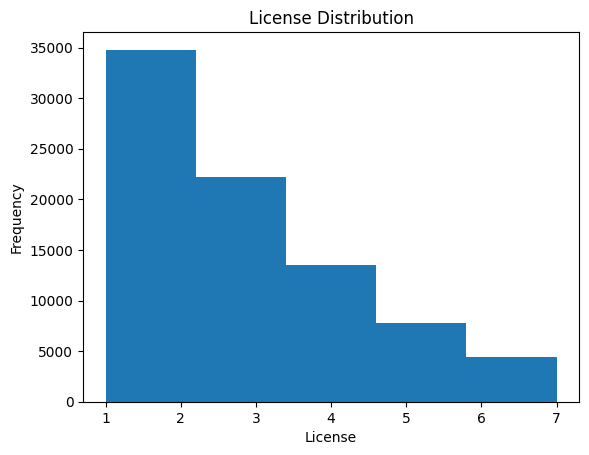

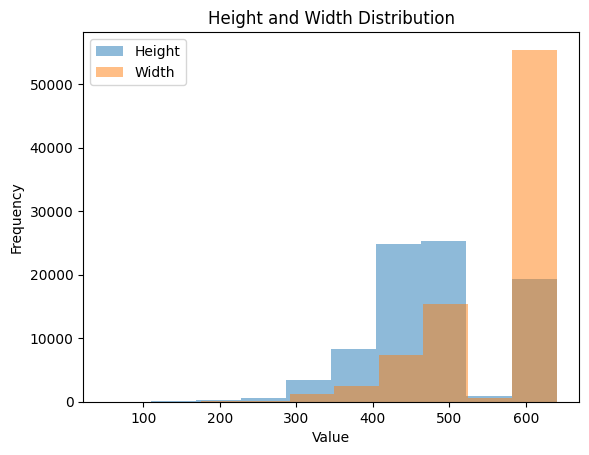

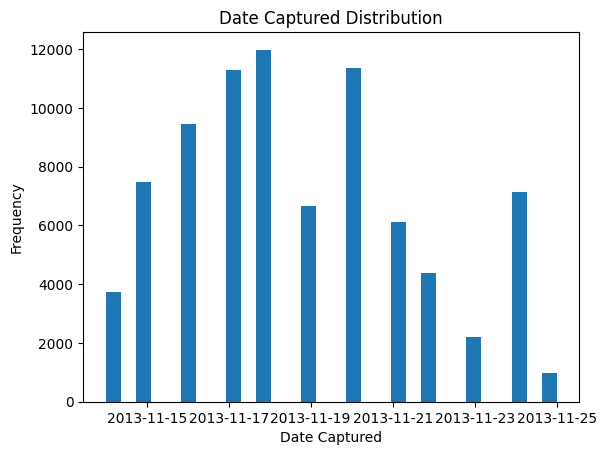

file_name
COCO    82783
Name: count, dtype: int64
coco_url
images.cocodataset.org    82783
Name: count, dtype: int64
flickr_url
farm4.staticflickr.com    15986
farm9.staticflickr.com    11851
farm3.staticflickr.com    11642
farm8.staticflickr.com    10189
farm1.staticflickr.com     9566
farm6.staticflickr.com     7959
farm5.staticflickr.com     7665
farm7.staticflickr.com     4568
farm2.staticflickr.com     3357
Name: count, dtype: int64


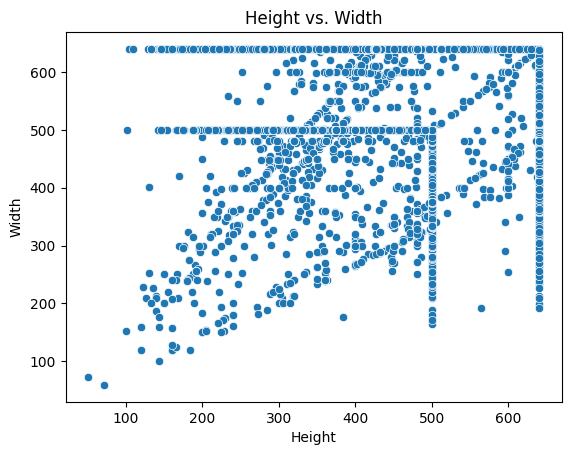

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_images.describe())

# Distribution of licenses
plt.hist(df_images['license'], bins=5)
plt.xlabel('License')
plt.ylabel('Frequency')
plt.title('License Distribution')
plt.show()

# Distribution of image heights and widths
plt.hist(df_images['height'], alpha=0.5, label='Height')
plt.hist(df_images['width'], alpha=0.5, label='Width')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Height and Width Distribution')
plt.legend()
plt.show()

# Distribution of dates captured
df_images['date_captured'] = pd.to_datetime(df_images['date_captured'])
plt.hist(df_images['date_captured'].dt.date, bins=30)
plt.xlabel('Date Captured')
plt.ylabel('Frequency')
plt.title('Date Captured Distribution')
plt.show()

# Top 10 most common file name prefixes
file_name_prefixes = df_images['file_name'].apply(lambda x: x.split('_')[0])
print(file_name_prefixes.value_counts().head(10))

# Top 10 most common URL domains
coco_url_domains = df_images['coco_url'].apply(lambda x: x.split('/')[2])
flickr_url_domains = df_images['flickr_url'].apply(lambda x: x.split('/')[2])
print(coco_url_domains.value_counts().head(10))
print(flickr_url_domains.value_counts().head(10))

# Correlation between height and width
sns.scatterplot(x='height', y='width', data=df_images)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Height vs. Width')
plt.show()

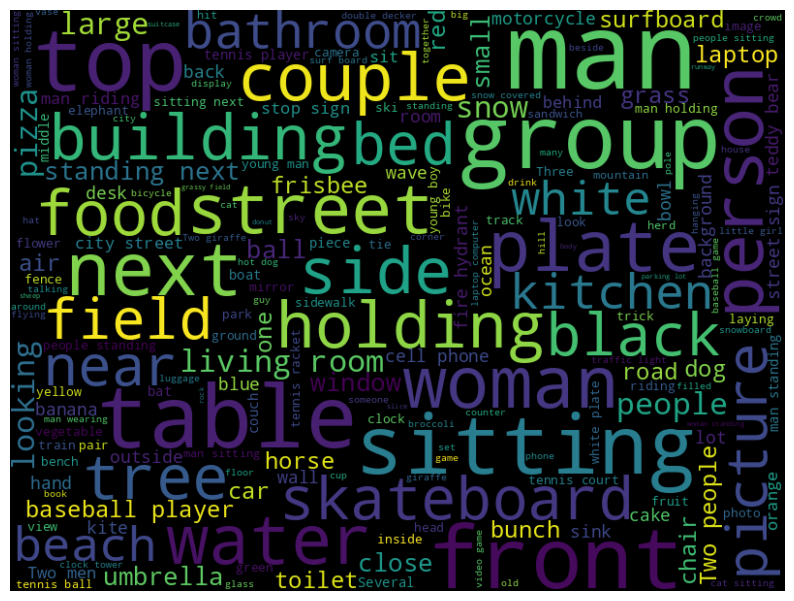

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

captions = df_annotations['caption']
wordcloud = WordCloud(width=800, height=600, random_state=42, max_font_size=110).generate(' '.join(captions))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

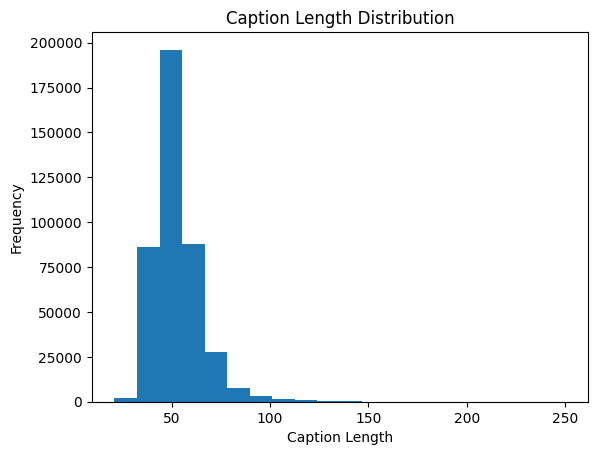

In [30]:
import matplotlib.pyplot as plt

caption_lengths = captions.str.len()
plt.hist(caption_lengths, bins=20)
plt.xlabel('Caption Length')
plt.ylabel('Frequency')
plt.title('Caption Length Distribution')
plt.show()

In [31]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

words = [word for caption in captions for word in word_tokenize(caption)]
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
print(top_10_words)

[('a', 443465), ('.', 310922), ('A', 241116), ('on', 149302), ('of', 141790), ('in', 127917), ('the', 118880), ('with', 106952), ('and', 98082), ('is', 67216)]


remove the stopwords, they are the most common, as expected

In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Get the English stopwords
stop_words = set(stopwords.words('english'))

words = [word for caption in captions for word in word_tokenize(caption) if word.lower() not in stop_words]
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
print(top_10_words)

[('.', 310922), ('man', 48850), ('sitting', 36615), (',', 31294), ('standing', 29899), ('next', 25871), ('people', 25723), ('white', 24877), ('woman', 23028), ('table', 21108)]


Remove also the puntuation

In [43]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Get the English stopwords
stop_words = set(stopwords.words('english'))

words = [re.sub(r'[^\w\s]', '', word) for caption in captions for word in word_tokenize(re.sub(r'[^\w\s]', '', caption)) if word.lower() not in stop_words]
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)
print(top_10_words)

[('man', 48633), ('sitting', 36613), ('standing', 29898), ('next', 25870), ('people', 25711), ('white', 24872), ('woman', 22845), ('table', 21104), ('street', 20520), ('Two', 20080)]
